# Jeopardy Riddler Express!

The original Riddler article for this project can be found
 [here](https://fivethirtyeight.com/features/can-you-snatch-defeat-from-the-jaws-of-victory/).
 This notebook deals with the Riddle Express: determining the expected return of a perfect(!)
 single Jeopardy round with a modified Daily Double.

 ## The Rules:
 1. We are playing a perfect game of single Jeopardy: we will successfully answer each
 question.
 2. We will control the board for the entire game, and (for this part of the problem) we will go
 through the board in raster order. That is, we will start with the top-left $\$$200 question, go
 horizontally though all the $\$$200 questions, then repeat for the $\$$400, $\$$600, ..., $\$$1,000
  questions following the same pattern.
 3. One question will be a Daily Double; we will either win double our current winnings on this
 question, or $\$$1,000, whichever is greater.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# some inputs...
row_values = [200, 400, 600, 800, 1000]  # values for questions in each row in the game
n_columns = 6  # number of columns in each row

# total number of questions:
n_questions = n_columns*len(row_values)

## Return for each cell of the game.

Let's look at the return each cell of the game represents. This "return" is just the sum of
winnings from each previous question we answered, where the previous questions are all those
before the current cell in raster order. The question ordering, question returns,
 and cumulative returns are given in Figures 1 to 3 below.

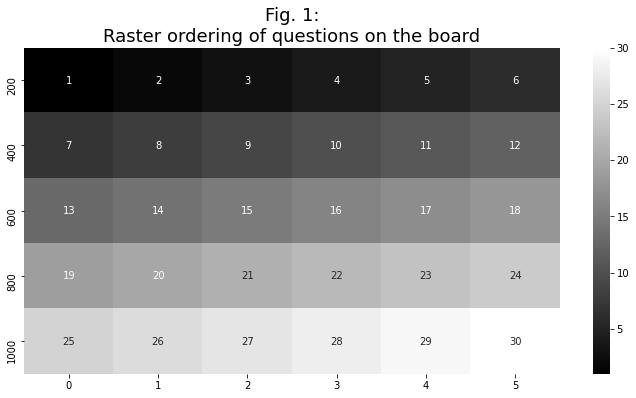

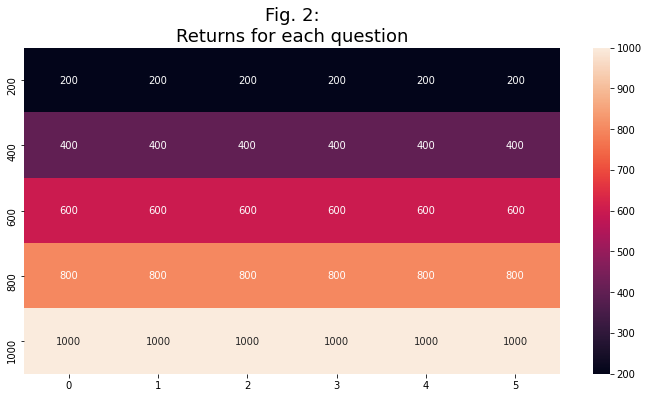

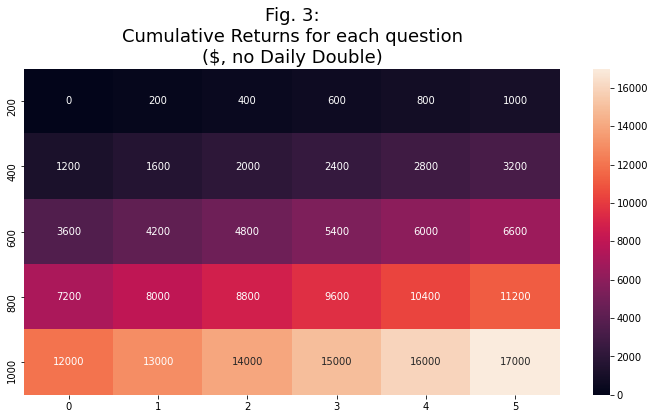

In [3]:
ordering_table = np.zeros([len(row_values), n_columns])
order_count = 1

# a table for non-cumulative question rewards
return_table = np.zeros([len(row_values), n_columns])

cum_return_table = np.zeros([len(row_values), n_columns])

for i,row_value in enumerate(row_values):
    for j in range(n_columns):
        ordering_table[i,j] = order_count
        order_count += 1
        return_table[i,j] = row_values[i]
        if j == 0 and i > 0:
            cum_return_table[i,j] = cum_return_table[i-1,-1] + row_values[i-1]
        else:
            cum_return_table[i,j] = cum_return_table[i,0] + j*row_value

# and plot
plt.figure(figsize=(12,6))
plt.title('Fig. 1:\nRaster ordering of questions on the board',
          fontsize=18)
sns.heatmap(ordering_table,
            annot=True, fmt='.0f',
            cmap='gray',
            yticklabels=row_values)
plt.show();

# and plot
plt.figure(figsize=(12,6))
plt.title('Fig. 2:\nReturns for each question',
          fontsize=18)
plt.yticks([row_values])
sns.heatmap(return_table,
            annot=True, fmt='.0f',
            yticklabels=row_values)
plt.show();

# and plot
plt.figure(figsize=(12,6))
plt.title('Fig. 3:\nCumulative Returns for each question\n($, no Daily Double)',
          fontsize=18)
plt.yticks([row_values])
sns.heatmap(cum_return_table,
            annot=True, fmt='.0f',
            yticklabels=row_values)
plt.show();

## So what's the expected return with a Daily Double space?

Well, a few things to note. First, let's get some notation:

Let questions be indexed by
$i \in [1,30]$, with question $i=1$ on the top-left, and the ordering given by Figure 1 above.
Then, the  return of that space is $r_i$ (Figure 2) and the cumulative return is
$R_i = \sum_{j=1}^{i-1}r_j$ if $i>1$, with $R_1=0$ (Figure 3).


Also, let $d \in [1,30]$ be the index of the Daily Double question, and let
the return of the Daily Double question occurring on question $i$ be $r_{d=i}$. Finally,
let $R$ be the total game payout.

Now,
1.  If a Daily Double appears on a question $i$, we will get a return of
$r_{d=i}=\mathrm{max}(1000,R_d)$.
2.  Since a Daily Double always returns a minimum of $\$$1,000, we know that a Daily Double
on any space along the first row will return this value. So, $r_{d=i} = 1000$ if $d \leq 6$.
3.  If the Daily Double occurs with $d > 6$, then the Daily Double return is simply $R_d$.
4.  The total game payout $R$ is the sum of the Daily Double return and the return of all
questions other than the daily double question. So, the game return $R$ as a function of $d$ is
$R(d) = r_{d=i} - r_d + \sum_{j=1}^{30}r_j$. This can be re-stated as
$R(d) = \mathrm{max}(1000,R_d) + R_{30} + r_{30} - r_d$, where $R_{30}$ is just the cumulative
return when we ask the last question and $r_{30}$ is the return
when we get the last question right. Note $R_{30} + r_{30} = \$18000$ from Figures 2 and 3.

So, the total return for the game is:
- FOR CASE A: Daily Double on First Row, $d\leq6$. $R(d) = 1000 + 18000 - 200 = 18800$.
- FOR CASE B: Daily Double not on First Row, $d>6$.
$R(d) = R_d + 18000 - r_d$.

Case A will occur 6/30 times, while Case B will occur 24/30 times, since the Daily Double
can occur on any question with equal probability. Let's plug these in and compute the
return for each value of $d$ and the total expected return.

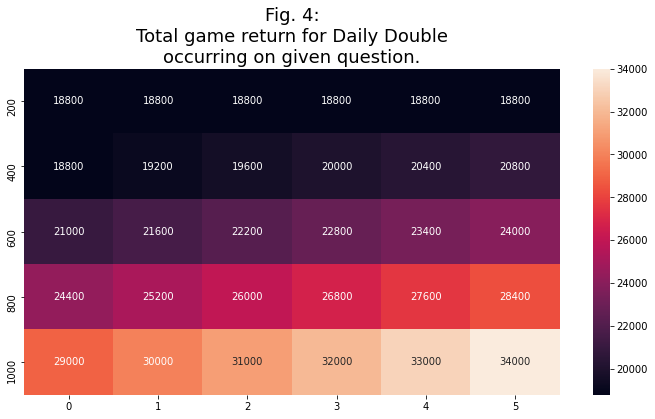

Expected Game Return: $23800.00.


In [4]:
# table to hold returns for each value of d
returns_for_daily_doubles = np.zeros([len(row_values), n_columns])

for i in range(len(row_values)):
    for j in range(n_columns):
        returns_for_daily_doubles[i,j] = max(1000,cum_return_table[i,j]) \
        + cum_return_table[-1,-1] + return_table[-1,-1] \
        - return_table[i,j]

# and plot...
plt.figure(figsize=(12,6))
plt.title('Fig. 4:\nTotal game return for Daily Double\noccurring on given question.',
          fontsize=18)
plt.yticks([row_values])
sns.heatmap(returns_for_daily_doubles,
            annot=True, fmt='.0f',
            yticklabels=row_values)
plt.show();

# and get expected value, assuming each Daily Double location is equally likely...
expected_game_return = np.mean(returns_for_daily_doubles.flatten())
print('Expected Game Return: ${:.2f}.'.format(expected_game_return))

## So we have an answer!

The expected return on the game is $\$$23,800. Of course, this may not be the ideal strategy.
In the next section, we can consider the result if we randomly pick questions to answer,
instead of following the raster ordering.

## Picking Random Questions.

Let's approach the second question, using monte carlo simulation.
We will select many permutations of question ordering to simulate the possible choices
a player could make when sequentially picking questions to answer.

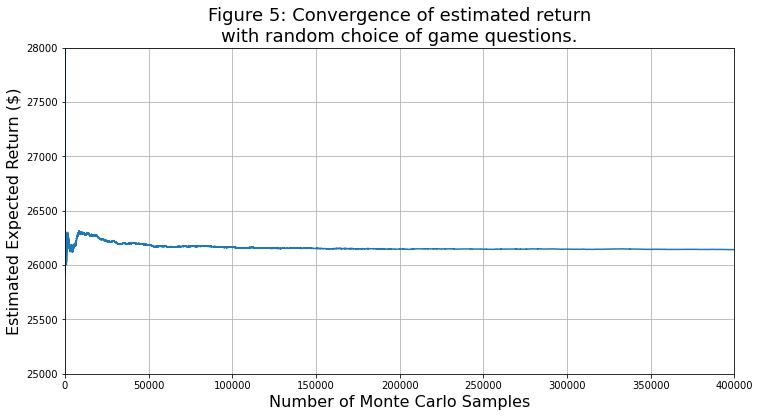

Estimated Expected Return: $26142.03.


In [5]:
# build a function that runs the simulation
def simulate_expected_return(seed = 12345,  # random state
                             n_samples = 5000,  # samples to take
                             random_question_choice = True): # if False, should return the Part 1 result
    sim_returns = np.zeros(n_samples)
    sim_returns_means = np.zeros(n_samples)
    sim_returns_stds = np.zeros(n_samples)
    np.random.seed(seed=seed)  # set random state

    for sample in range(n_samples):
        # get random question ordering
        if random_question_choice:
            perm_ordering = np.random.permutation(ordering_table.flatten()).reshape(len(row_values),
                                                                                    n_columns)
        else:
            perm_ordering = ordering_table
        # get random Daily Double question location
        d = np.random.randint(1,31)

        # get new returns for the permuted choice of game, for each possible value of d
        cum_return = 0
        current_question = 1
        for i in range(len(row_values)):
            for j in range(n_columns):
                perm_loc = np.where(ordering_table == perm_ordering[i,j])
                perm_i = perm_loc[0][0]
                perm_j = perm_loc[1][0]
                if current_question == d:
                    daily_double_return = max(1000, cum_return)
                    cum_return += daily_double_return
                else:
                    cum_return += return_table[perm_i,perm_j]
                current_question += 1

        sim_returns[sample] = cum_return
        if sample >= 1:
            sim_returns_means[sample] = np.mean(sim_returns[:sample])

    return sim_returns, sim_returns_means

# get simulation results
returns, returns_means = simulate_expected_return(n_samples = 400000,
                                                  seed=12345,
                                                  random_question_choice=True)

# and plot
plt.figure(figsize=(12,6))
plt.plot(range(len(returns_means[1:])),
               returns_means[1:])
plt.title('Figure 5: Convergence of estimated return\nwith random choice of game questions.',
          fontsize=18)
plt.ylim([25000,28000])
plt.xlim([0,len(returns_means)])
plt.ylabel('Estimated Expected Return ($)', fontsize=16)
plt.xlabel('Number of Monte Carlo Samples', fontsize=16)
plt.grid()
plt.show();

print('Estimated Expected Return: ${:.2f}.'.format(returns_means[-1]))

## And so, with random question choices, we have an estimate.

And that estimate is an expected return of $\$$26,142 for a perfect game of single Jeopardy,
with random question choices and random placement of the Daily Double. This is slightly higher
than the result for raster order question picking, so the perfect Jeopardy player should prefer
this strategy! I suspect the best strategy would be reverse-raster, guaranteeing you get more
high-value questions early to maximize the eventual Daily Double bonus.